<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M3_AI1_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M3_AI1_CONSULTA DE LA EUROSTAT**

In [52]:
import pandas as pd
import numpy as np
import json
from urllib.request import urlopen
import os
import matplotlib as plot

In [41]:
url_eurostat = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/ilc_pw01?precision=1&sex=T&indic_wb=JOBSAT&isced11=ED5-8&age=Y25-34"

In [42]:
result = json.load(urlopen(url_eurostat))
print(result['dimension'])

{'unit': {'label': 'unit', 'category': {'index': {'RTG': 0}, 'label': {'RTG': 'Rating (0-10)'}}}, 'isced11': {'label': 'isced11', 'category': {'index': {'ED5-8': 0}, 'label': {'ED5-8': 'Tertiary education (levels 5-8)'}}}, 'indic_wb': {'label': 'indic_wb', 'category': {'index': {'JOBSAT': 0}, 'label': {'JOBSAT': 'Job satisfaction'}}}, 'sex': {'label': 'sex', 'category': {'index': {'T': 0}, 'label': {'T': 'Total'}}}, 'age': {'label': 'age', 'category': {'index': {'Y25-34': 0}, 'label': {'Y25-34': 'From 25 to 34 years'}}}, 'geo': {'label': 'geo', 'category': {'index': {'AL': 0, 'AT': 1, 'BE': 2, 'BG': 3, 'CH': 4, 'CY': 5, 'CZ': 6, 'DE': 7, 'DK': 8, 'EA': 9, 'EA18': 10, 'EA19': 11, 'EE': 12, 'EL': 13, 'ES': 14, 'EU': 15, 'EU27_2007': 16, 'EU27_2020': 17, 'EU28': 18, 'FI': 19, 'FR': 20, 'HR': 21, 'HU': 22, 'IE': 23, 'IS': 24, 'IT': 25, 'LT': 26, 'LU': 27, 'LV': 28, 'ME': 29, 'MK': 30, 'MT': 31, 'NL': 32, 'NO': 33, 'PL': 34, 'PT': 35, 'RO': 36, 'RS': 37, 'SE': 38, 'SI': 39, 'SK': 40, 'TR': 

In [43]:
!pip install eurostat

In [44]:
import eurostat

df = eurostat.get_data_df("ilc_pw01")

In [45]:
df.head()

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
0,RTG,ED0-2,ACCSAT,F,Y16-24,AT,NaN,8.6
1,RTG,ED0-2,ACCSAT,F,Y16-24,BE,NaN,7.8
2,RTG,ED0-2,ACCSAT,F,Y16-24,BG,NaN,5.3
3,RTG,ED0-2,ACCSAT,F,Y16-24,CH,NaN,NaN
4,RTG,ED0-2,ACCSAT,F,Y16-24,CY,NaN,8.2


In [46]:
df.shape

(40899, 8)

In [54]:
#Nivel de educación (isced11): Tertiary education ED5-8
#Indicador (indic_wb):   JOBSAT
#Género (sex): T – Total
#Edad (age): Y25-34 – From 25 to 34 years

filter = df[(df['isced11'] =="ED5-8") & (df['indic_wb'] =="JOBSAT") & (df['age'] =="Y25-34") & (df['sex'] =="T")]

In [55]:
filter.shape

(44, 8)

In [56]:
filter.head(6)

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
23641,RTG,ED5-8,JOBSAT,T,Y25-34,AL,6.5,NaN
23642,RTG,ED5-8,JOBSAT,T,Y25-34,AT,8.0,8.1
23643,RTG,ED5-8,JOBSAT,T,Y25-34,BE,7.6,7.4
23644,RTG,ED5-8,JOBSAT,T,Y25-34,BG,7.0,6.9
23645,RTG,ED5-8,JOBSAT,T,Y25-34,CH,7.5,NaN
23646,RTG,ED5-8,JOBSAT,T,Y25-34,CY,7.4,7.4


In [57]:
filter['geo\\time'].unique()

array(['AL', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA', 'EA18',
       'EA19', 'EE', 'EL', 'ES', 'EU', 'EU27_2007', 'EU27_2020', 'EU28',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME',
       'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK',
       'TR', 'UK', 'XK'], dtype=object)

In [61]:
data_2018 = filter[2018]

In [63]:
data_2018.index = filter['geo\\time']

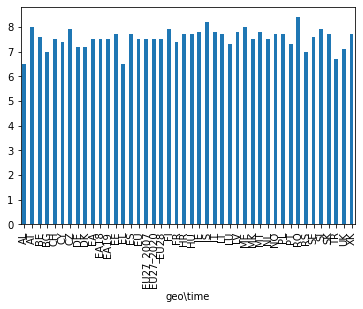

In [64]:
data_2018.plot.bar()